In [1]:
library(RColorBrewer)

suppressPackageStartupMessages(library(destiny))

palette(brewer.pal(6, 'Spectral'))

options(device = function(...) png('/dev/null', ...))
options(repr.plot.width = 7, repr.plot.height = 6)
options(jupyter.plot_mimetypes = c('application/pdf', 'image/png'))

Quickstart
=====

A short version to achive the above is by using the preprocessed version of the dataset provided with this package. `data(guo)` is already preprocessed (using the method first mentioned), has its threshold set to a constant 15 and is ready to use. Since the platform’s maximum amplification cycles are 40, that number can be used as upper border of the uncertainty range.

In [2]:
library(destiny)
data(guo)

The “divisions” column is an annotation that will be automatically excluded later:

In [3]:
colnames(guo)[!sapply(guo, is.double)]

[1] "divisions"

It can be used directly for $\sigma$ estimation:

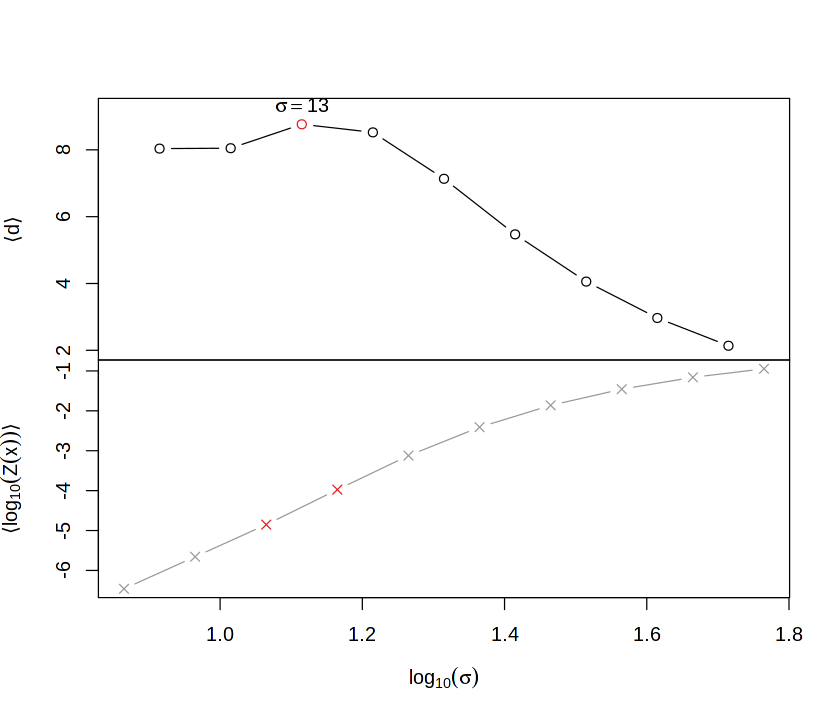

In [4]:
sigmas <- find.sigmas(guo, verbose = FALSE,
                      censor.val = 15, censor.range = c(15, 40))
sigmas

And can also be used directly for diffusion map creation:

In [5]:
guo.dif <- DiffusionMap(guo, optimal.sigma(sigmas), verbose = FALSE,
                        censor.val = 15, censor.range = c(15, 40))
guo.dif

DiffusionMap (20 Diffusion components and 429 samples)
eigenvalues:   num [1:20] 0.971 0.939 0.928 0.819 0.638 ...
eigenvectors:  num [1:429, 1:20] -0.00306 -0.00301 -0.00234 -0.0028 -0.00321 ...
  ..colnames:  chr [1:20] "DC1" "DC2" "DC3" "DC4" ...
optimal.sigma: 13.027544365655

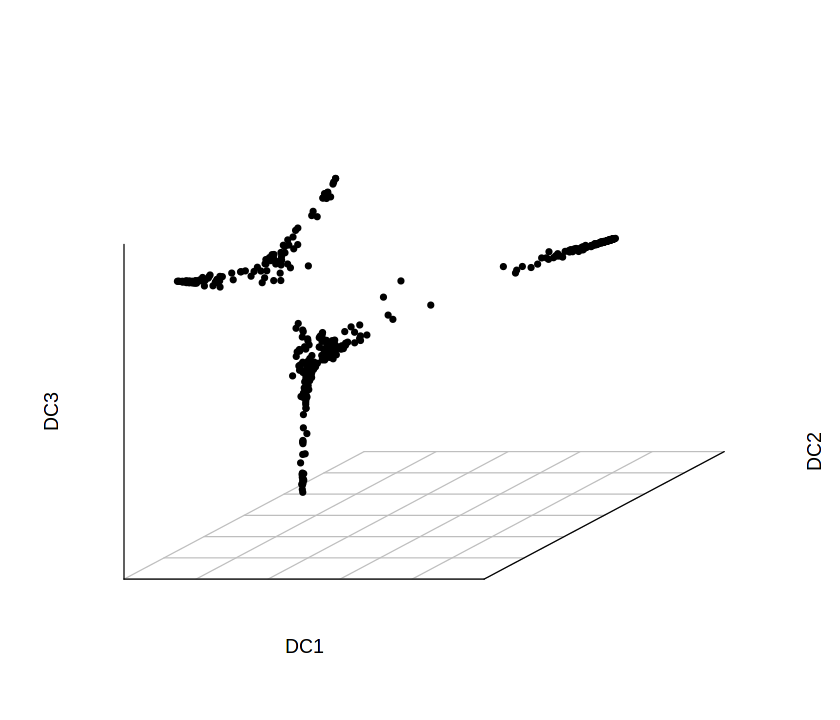

In [6]:
par(pch = 20)  # prettier points
plot(guo.dif)

using the annotation shows that the approximation worked

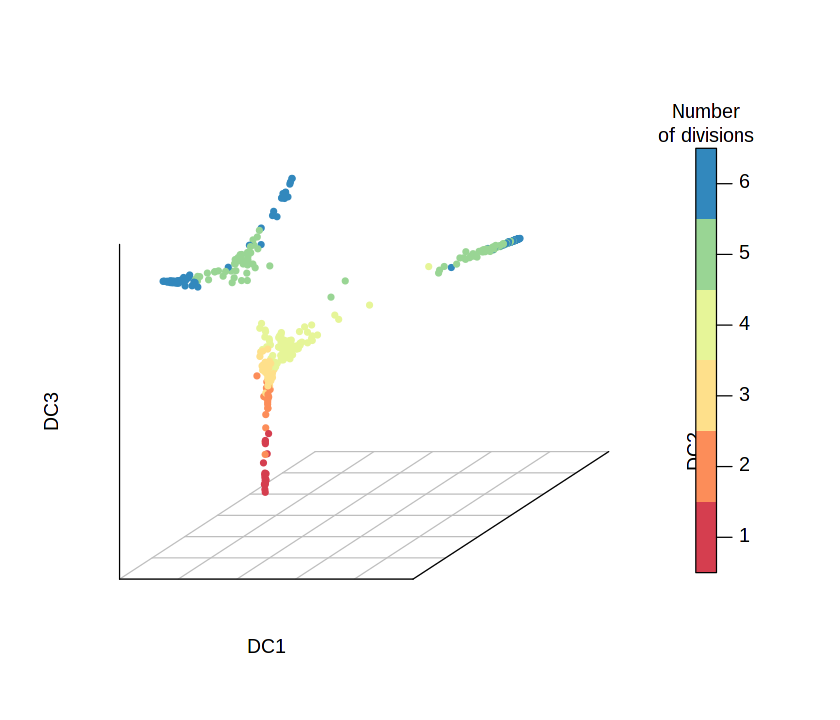

In [7]:
par(pch = 20)
plot(guo.dif, col.by = 'divisions', legend.main = 'Number\nof divisions')